In [47]:
import qiskit as q
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

%matplotlib inline

statevector_simulator = q.Aer.get_backend('statevector_simulator')
qasm_simulator = q.Aer.get_backend('qasm_simulator')


In [48]:
def do_job(circuit):
    job = q.execute(circuit, backend=statevector_simulator)
    result = job.result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.qubits
    
    circuit.measure([i for i in range(len(n_qubits))], [i for i in range(len(circuit.clbits))])
    qasm_job = q.execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()
    return statevec, counts

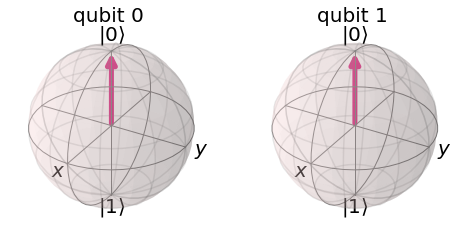

In [49]:
circuit = q.QuantumCircuit(2, 2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

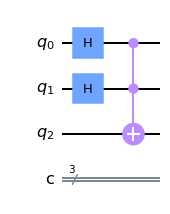

In [50]:
circuit = q.QuantumCircuit(3, 3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0, 1, 2)

circuit.draw(output='mpl')

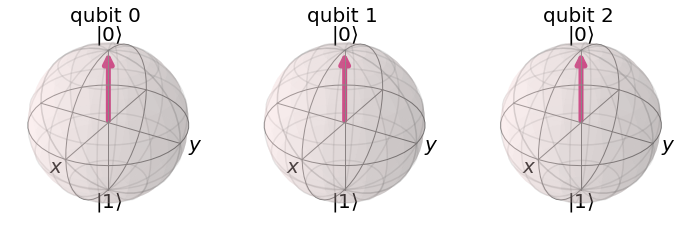

In [53]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

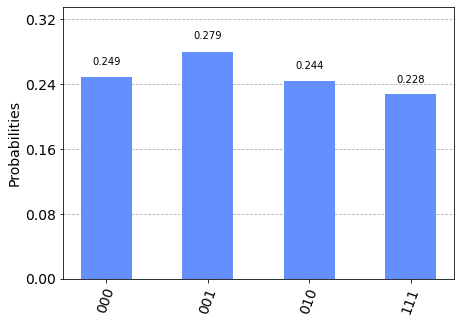

In [54]:
plot_histogram([counts])